In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 2000
assets = ['VYM', 'VTI', 'VOO','AAPL']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2016-1-1', end = '2019-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VYM,VTI,VOO,AAPL
Date,,,,
2016-01-04,54.567036,92.296410,164.837189,24.251438
2016-01-05,54.840076,92.503036,165.132324,23.643711
2016-01-06,54.120239,91.263313,163.039551,23.181013
2016-01-07,52.953602,89.026413,159.068619,22.202667
2016-01-08,52.357876,88.011307,157.378342,22.320070


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VYM,VTI,VOO,AAPL
Date,,,,
2018-12-24,66.909416,113.880165,204.086212,35.634811
2018-12-26,69.550941,119.360130,214.410553,38.144268
2018-12-27,70.231743,120.435165,216.403305,37.896721
2018-12-28,70.186363,120.282959,216.128128,37.916138
2018-12-31,70.794540,121.424606,218.073410,38.282600


<AxesSubplot:xlabel='Date'>

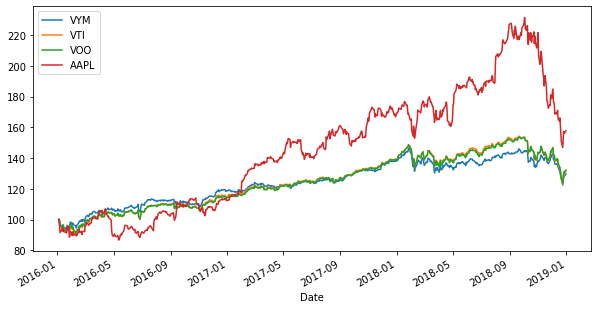

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

VYM     0.086438
VTI     0.091065
VOO     0.092919
AAPL    0.151567
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,VYM,VTI,VOO,AAPL
VYM,0.013548,0.014405,0.014429,0.014443
VTI,0.014405,0.016910,0.016753,0.019614
VOO,0.014429,0.016753,0.016739,0.019900
AAPL,0.014443,0.019614,0.019900,0.055666


In [9]:
log_returns.corr() #get correlation between each pair.

,VYM,VTI,VOO,AAPL
VYM,1.000000,0.951673,0.958134,0.525931
VTI,0.951673,1.000000,0.995809,0.639298
VOO,0.958134,0.995809,1.000000,0.651918
AAPL,0.525931,0.639298,0.651918,1.000000


***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,AAPL
0,0.115249,0.155456,0.046451,0.531043,0.019847,0.402658
1,0.112351,0.150872,0.012993,0.502196,0.136170,0.348641
2,0.120659,0.164200,0.044313,0.097761,0.376950,0.480976
3,0.104634,0.139683,0.025827,0.510489,0.244946,0.218738
4,0.111298,0.145126,0.271455,0.064680,0.318444,0.345420


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,AAPL
1995,0.113190,0.150543,0.119771,0.336559,0.174163,0.369507
1996,0.105601,0.136853,0.319638,0.310687,0.108292,0.261384
1997,0.105983,0.137676,0.242943,0.049337,0.456559,0.251161
1998,0.094052,0.125005,0.383907,0.322751,0.221403,0.071939
1999,0.098361,0.126891,0.471984,0.160626,0.217362,0.150028


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,VYM,VTI,VOO,AAPL
1553,0.089819,0.118282,0.826126,0.023995,0.110686,0.039194
401,0.090198,0.120201,0.649172,0.233403,0.084715,0.032710
927,0.093655,0.120240,0.785081,0.037175,0.077269,0.100475
1248,0.089657,0.120408,0.615326,0.227175,0.137938,0.019561
970,0.090008,0.120418,0.623581,0.234470,0.115259,0.026689
...,...,...,...,...,...,...
1469,0.132627,0.189268,0.076276,0.083590,0.152001,0.688134
1092,0.133104,0.190492,0.098643,0.179369,0.020233,0.701755
639,0.134708,0.194046,0.090621,0.112170,0.071106,0.726103
825,0.134327,0.194118,0.028978,0.247298,0.006666,0.717058


Text(0, 0.5, 'Expected Return')

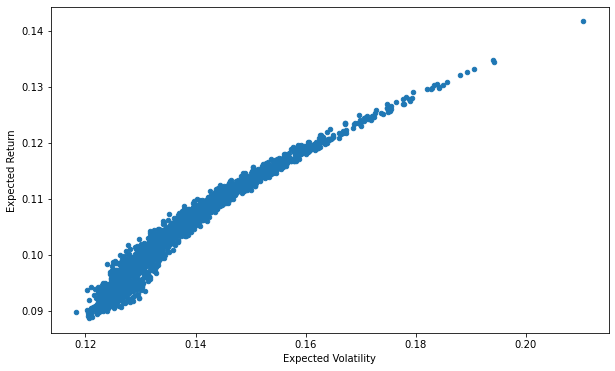

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("\tinvest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
	invest in VYM for $20653.14.
	invest in VTI for $599.86.
	invest in VOO for $2767.15.
	invest in AAPL for $979.84.
Expected annual portfolio return is 9.0%
Expected annual portfolio volatility is 11.8%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [19]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 14.3%
Actual annual portfolio volatility is 25.6%
